In [12]:
import sys
sys.path.append('../scripts')

import os
import json

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
def genBaseMapJsonTemplate(outputJsonPath='./hydroJson/BaseMapJsonTemplate.json', returnDict=False):
    """
    Summary:
    ---
    生成绘图参数的json文件，方便调整绘图参数
    
    Args:
    ---
        outputJsonPath (str, optional): 输出path. Defaults to './hydroJson/BaseMapJsonTemplate.json'.
        returnDict (bool, optional): 是否返回字典. Defaults to False.
    """
    PARAMETERS = {
        'dpi'        : 100,       
        'transform'         : 'PlateCarree',
        'central_longitude' : 0,
        'facecolor'         : 'none',
        'has_stock_img'     : False,
        'has_coastlines'    : True,
        'coast_line_width'  : 0.5,
        'has_land'          : False,
        'has_ocean'         : False,
        
    }
    
    if not os.path.exists(os.path.dirname(outputJsonPath)):
        os.mkdir(os.path.dirname(outputJsonPath))
        
    with open(outputJsonPath, "w", encoding='utf-8') as f:
        json.dump(PARAMETERS, f, indent=2)  
    
    print("Json file of parameters has written to [{}]".format(outputJsonPath))
    
    if returnDict:
        return PARAMETERS

In [18]:
genBaseMapJsonTemplate('./hydroJson/BaseMapJsonTemplate.json')

Json file of parameters has written to [./hydroJson/BaseMapJsonTemplate.json]


In [19]:
class BaseMap:
    def __init__(self, jsonPath='./hydroJson/BaseMapJsonTemplate.json') -> None:
        assert os.path.isfile(jsonPath), "Json file doesn't exist! "
        self.jsonPath = jsonPath
        with open(jsonPath) as f:
            self.paraDict = json.load(f)
            
    def reloadJson(self):
        with open(self.jsonPath) as f:
            self.paraDict = json.load(f)  
            
    def plot(self):
        self.reloadJson()
        PARAS = self.paraDict
        
        fig = plt.figure(dpi=PARAS['dpi'])
        assert PARAS['transform'] in ['PlateCarree'], \
            "Projection not support '{}'".format(PARAS['transform'])
        
        if PARAS['transform'] == 'PlateCarree':
            proj = ccrs.PlateCarree(central_longitude=PARAS['central_longitude'])
        else:
            proj = ccrs.PlateCarree()
            
        ax = fig.add_subplot(1, 1, 1, projection=proj, facecolor=PARAS['facecolor'])
        
        if PARAS['has_stock_img']:
            ax.stock_img()
        if PARAS['has_coastlines']:
            ax.coastlines(lw=PARAS['coast_line_width'])
        if PARAS['has_land']:
            ax.add_feature(cfeature.LAND)
        if PARAS['has_ocean']:
            ax.add_feature(cfeature.OCEAN)
        
    

In [20]:
b = BaseMap()

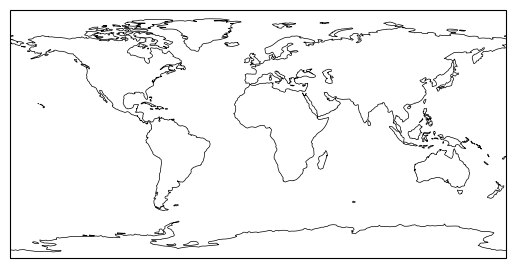

In [23]:
b.plot()